# A numpy implementation of LDA

## The class

In [1]:
import numpy as np

class LDA:
    
    def __init__(self):
        self.vals = None
        self.vecs = None
    
    def transform(self, X, y):
        self.__fit(X, y)
        
        return np.dot(X, self.vecs.T)
    
    def __fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)
        
        # S_W, S_B
        mean_overall = np.mean(X, axis=0)
        S_W = np.zeros((n_features, n_features))
        S_B = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            S_W += (X_c - mean_c).T.dot(X_c - mean_c)
            
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            S_B += n_c * (mean_diff).dot(mean_diff.T)
            
        A = np.linalg.inv(S_W).dot(S_B)
        vals, vecs = np.linalg.eig(A)
        vecs = vecs.T
        idxs = np.argsort(abs(vals))[::-1]
        self.vals = vals[idxs]
        self.vecs = vecs[idxs]

## Example usage

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wine = pd.read_csv('example_data/wine.csv')
X = wine.values[:,1:12].astype(float)
y = wine.replace('W', 0).replace('R', 1).values[:, 0]

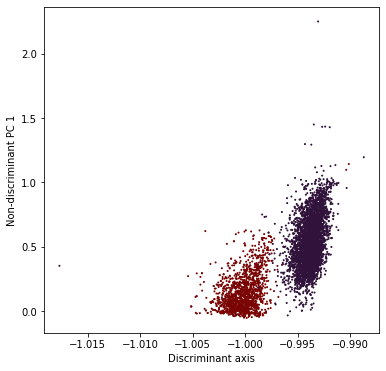

In [3]:
lda = LDA()
proj = lda.transform(X, y)

x1 = proj[:, 0]
non_discriminant = X @ lda.vecs

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x1, non_discriminant[:, 0], s=1, c=y,
            cmap=plt.cm.get_cmap('turbo', 2))
ax.set_xlabel("Discriminant axis")
ax.set_ylabel("Non-discriminant PC 1")    
plt.show()

## Without class just as a cell:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wine = pd.read_csv('example_data/wine.csv')
X = wine.values[:,1:12].astype(float)
y = wine.replace('W', 0).replace('R', 1).values[:, 0]

In [5]:
n_features = X.shape[1]
class_labels = np.unique(y)

# S_W, S_B
mean_overall = np.mean(X, axis=0)
S_W = np.zeros((n_features, n_features))
S_B = np.zeros((n_features, n_features))
for c in class_labels:
    X_c = X[y == c]
    mean_c = np.mean(X_c, axis=0)
    S_W += (X_c - mean_c).T.dot(X_c - mean_c)

    n_c = X_c.shape[0]
    mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
    S_B += n_c * (mean_diff).dot(mean_diff.T)

A = np.linalg.inv(S_W).dot(S_B)
vals, vecs = np.linalg.eig(A)
vecs = vecs.T
idxs = np.argsort(abs(vals))[::-1]
vals = vals[idxs]
vecs = vecs[idxs]

proj = np.dot(X, vecs.T)